# Snack Club 2023 Wrapped Data Analysis
Snack Club is four friends getting together ~once a week to rate snacks. This the is (first ever) data analysis of snack scores given in 2023. 

Snacks are from subscription service, [Snack Crate](https://www.snackcrate.com/). 

The goofy presentation for a subset of these results can be found [here (Google Drive link)](https://docs.google.com/presentation/d/1ymt2Gg3I-l3x6Hns0eWbP5eVIhWxiU42Tw-eds5HK9U/edit?usp=sharing).

In [1]:
import glob
data_files = glob.glob("./input/*.csv")
data_files

['./input/2023 data pre-processing - J.csv',
 './input/2023 data pre-processing - E.csv',
 './input/2023 data pre-processing - C.csv',
 './input/2023 data pre-processing - A.csv']

In [2]:
import pandas as pd
pd.set_option('display.precision', 2)

df_list = []
for fn in data_files:
    df = pd.read_csv(fn)
    df['Member'] = fn[-5]
    df_list.append(df)
df = pd.concat(df_list)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.sort_values(['Date', 'Country'])
df = df.set_index(['Date','Country','Snack','Member'])

In [3]:
# Identify missing scores
import numpy as np
print('Any null values?')
display(df[df.isna().any(axis=1)])
print('Any non-numeric values?')
display(df[~df.applymap(np.isreal).any(axis=1)])

Any null values?


,,,,Packaging,Presentation,Taste,Texture
Date,Country,Snack,Member,,,,


Any non-numeric values?


,,,,Packaging,Presentation,Taste,Texture
Date,Country,Snack,Member,,,,


## Stats

In [4]:
# Overall Score
df['Overall Score'] = df.mean(axis=1)
df.to_csv('2023_snack_club_scores.csv')

## Overall Scores

In [5]:
# Stats overall
print('2023 Snack Club Statistics!')
print('Snacks rated:', df.reset_index()['Snack'].value_counts().count())
print('Countries / snack crates #:', df.reset_index()['Country'].value_counts().count())
print('Countries / snack crates:', df.reset_index()['Country'].value_counts().index.values)
print('Snack scores, total given:', df.count().sum())

2023 Snack Club Statistics!
Snacks rated: 147
Countries / snack crates #: 14
Countries / snack crates: ['Thailand' 'Colombia' 'United Kingdom' 'Italy' 'Greece' 'Belgium'
 'Ireland' 'India' 'China' 'Korea' 'Spain' 'Canada'
 'America-Vegas-Special' 'Caribbean']
Snack scores, total given: 2940


## By Member

In [6]:
# display(df.agg(['idxmax','idxmin']))
idx = pd.IndexSlice
# Stats Members
display('*************************************')
display('Stats by Member')
df_stats_members = df.groupby(['Member']).agg(['min','max','mean','median','std','idxmax','idxmin'])
display(df_stats_members.loc[:, idx[:, ['min','max']]])
display(df_stats_members.loc[:, idx[:, ['mean','median','std']]])
# display(df_stats_members.loc[:, idx[:, ['idxmax','idxmin']]])
display(df_stats_members.loc[:, idx[:, ['mean']]].agg(['idxmax','idxmin']))
display(df_stats_members.loc[:, idx[:, ['std']]].agg(['idxmax','idxmin']))

'*************************************'

'Stats by Member'

Packaging      Presentation      Taste       Texture       \
             min  max          min  max   min   max     min  max   
Member                                                             
A           1.75  5.0          1.5  4.8   1.5  4.75     1.0  5.0   
C           1.50  5.0          1.5  5.0   1.0  4.50     1.0  5.0   
E           1.50  5.0          1.0  5.0   1.2  5.00     1.0  4.7   
J           1.50  5.0          1.0  5.0   1.0  5.00     1.0  5.0   

       Overall Score        
                 min   max  
Member                      
A               1.75  4.55  
C               1.88  4.50  
E               1.62  4.45  
J               1.50  4.62

Packaging              Presentation              Taste               \
            mean median   std         mean median   std  mean median   std   
Member                                                                       
A           3.32    3.4  0.79         3.16    3.0  0.73  3.55   3.75  0.74   
C           3.47    3.5  0.73         3.31    3.5  0.73  3.48   3.50  0.78   
E           3.26    3.3  0.73         2.96    3.0  0.88  3.37   3.50  0.83   
J           3.18    3.0  0.84         3.12    3.0  0.79  3.14   3.00  0.92   

       Texture              Overall Score               
          mean median   std          mean median   std  
Member                                                  
A         3.38    3.5  0.82          3.35   3.38  0.53  
C         3.52    3.5  0.78          3.44   3.50  0.50  
E         3.24    3.4  0.84          3.21   3.25  0.56  
J         3.28    3.5  0.81          3.18   3.25  0.56

,Packaging,Presentation,Taste,Texture,Overall Score
,mean,mean,mean,mean,mean
idxmax,C,C,A,C,C
idxmin,J,E,J,E,J


,Packaging,Presentation,Taste,Texture,Overall Score
,std,std,std,std,std
idxmax,J,E,J,E,J
idxmin,E,C,A,C,C


## By Snack

### Top snacks by category, overall

In [7]:
# # Stats Snacks
display('Stats by Snack')
df_stats_snacks = df.groupby(['Snack']).agg(['min','max','mean','median','std'])
idx = pd.IndexSlice
df_ss_mean = df_stats_snacks.loc[:, idx[:, ['mean']]].droplevel(level=1,axis='columns').sort_values(by=['Taste','Overall Score','Texture'],ascending=False)
display(df_ss_mean)
display('*************************************')
df_ss_mm = df_stats_snacks.loc[:, idx[:, ['mean','median','std']]]
display(df_ss_mm.agg(['idxmax','idxmin'])) # only returns first instance

'Stats by Snack'

,Packaging,Presentation,Taste,Texture,Overall Score
Snack,,,,,
Keogh's Shamrock and Sour Cream Chips,4.69,4.20,4.62,4.05,4.39
Prele-G Gold Biscuits,2.25,4.38,4.62,4.00,3.81
Hi-Chew Grapefruit,4.40,3.70,4.50,4.14,4.18
Salati Preziosi Parika chips,3.92,3.25,4.50,3.50,3.79
Smiths Scampi Flavor fries,2.75,4.06,4.42,4.00,3.81
...,...,...,...,...,...
Lotte Choco Pie,2.42,2.75,2.08,2.05,2.33
Choclitos Limon chips,2.75,3.20,2.05,3.38,2.84
Kerr's Toffee candy,3.00,1.62,2.00,1.82,2.11


'*************************************'

Packaging  \
                                      mean   
idxmax  Hard MtnbDew Baja Blast Zero Sugar   
idxmin        Hula Hoops Puft Grilled Beef   

                                            \
                                    median   
idxmax  Hard MtnbDew Baja Blast Zero Sugar   
idxmin        Hula Hoops Puft Grilled Beef   

                                                  \
                                             std   
idxmax                      Chips Ahoy Cranberry   
idxmin  Caffrey's Big Time Chocolate Caramel Bar   

                        Presentation                                \
                                mean                        median   
idxmax  Soejun Yang Jelly "cat paws"  Soejun Yang Jelly "cat paws"   
idxmin             Sherbert fountain             Sherbert fountain   

                                                           Taste  \
                      std                                   mean   
idxmax    Tronky Nocciola  Keogh's Shamrock and Sour Cream Chips   
idxmin  5050 Maska Chaska                      Sherbert fountain   

                                                                   \
                                       median                 std   
idxmax  Keogh's Shamrock and Sour Cream Chips    Big Roll Seaweed   
idxmin                      Sherbert fountain  Hi-Chew Grapefruit   

                    Texture                       \
                       mean               median   
idxmax  Cote D'OR chocolate  Cote D'OR chocolate   
idxmin   Lotte Custard Cake   Lotte Custard Cake   

                                                        Overall Score  \
                                    std                          mean   
idxmax  Millions strawberry fruit candy  Soejun Yang Jelly "cat paws"   
idxmin          Bear Paws Pattes d'ours             Sherbert fountain   

                                                                     
                              median                            std  
idxmax  Soejun Yang Jelly "cat paws"        Pororo Straw Type Jelly  
idxmin             Sherbert fountain  Koh Kae Coconut Cream Peanuts

### Plots of Best Snacks by Average Member Score & Category

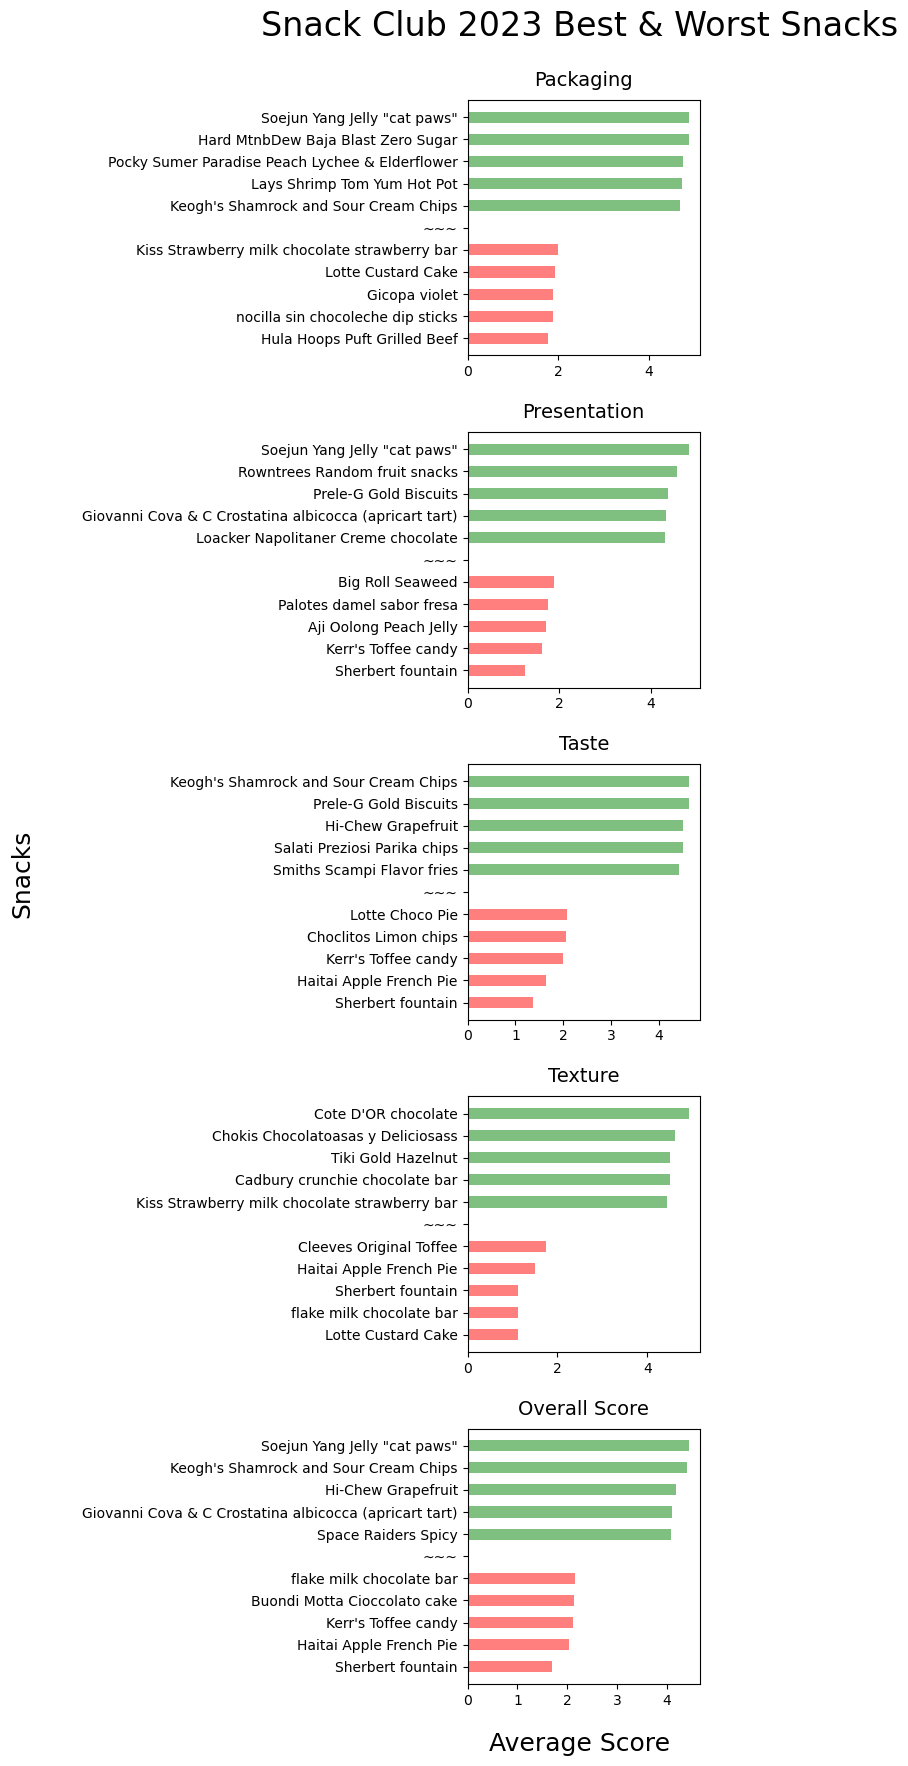

In [8]:
import matplotlib.pyplot as plt

df_mean = df_stats_snacks.loc[:, idx[:, ['mean']]]
df_mean.columns = df_mean.columns.droplevel(1)

fig, axs = plt.subplots(5,1,figsize=(3,18))
keys = [x for x in df_mean.columns] # preserves order
targets = zip(keys, axs.flatten())
fig.suptitle('Snack Club 2023 Best & Worst Snacks', fontsize=24)
fig.supylabel('Snacks',x=-1.4,ha='left', fontsize=18)
fig.supxlabel('Average Score', fontsize=18)
colors = {'Packaging':'blue',
          'Presentation':'green',
          'Taste':'red',
          'Texture':'purple',
         'Overall Score': 'cyan'}
by_label = {}
for i, (key, ax) in enumerate(targets):
    df_topfive = df_mean[key].sort_values(ascending=False)[0:5].sort_values()
    df_lowfive = df_mean[key].sort_values()[0:5].sort_values()
    df_low_top = pd.concat([df_topfive, pd.Series(['~',0]), df_lowfive])
    
    ax.set_title(f"{key}", fontsize=14,pad=10)
        
    snacks = df_lowfive.index.values
    scores = df_lowfive.values
    color = 'red'
    ax.barh(snacks, scores,
           color=color,label=key, 
           alpha=.5,height=0.5)
    
    ax.barh(['~~~'], [0],height=0.0)
    
    snacks = df_topfive.index.values
    scores = df_topfive.values
    color = 'green'
    ax.barh(snacks, scores,
           color=color,label=key, 
           alpha=.5,height=0.5)
fig.align_labels() 
fig.subplots_adjust(top=0.93,bottom=0.05,hspace = 0.3, wspace = 0.1)
fig.savefig(f'plots/sc_bestworst_snack_avg.png',bbox_inches='tight')

### Plots of Snack Standard Devision Scores by Member Score & Category

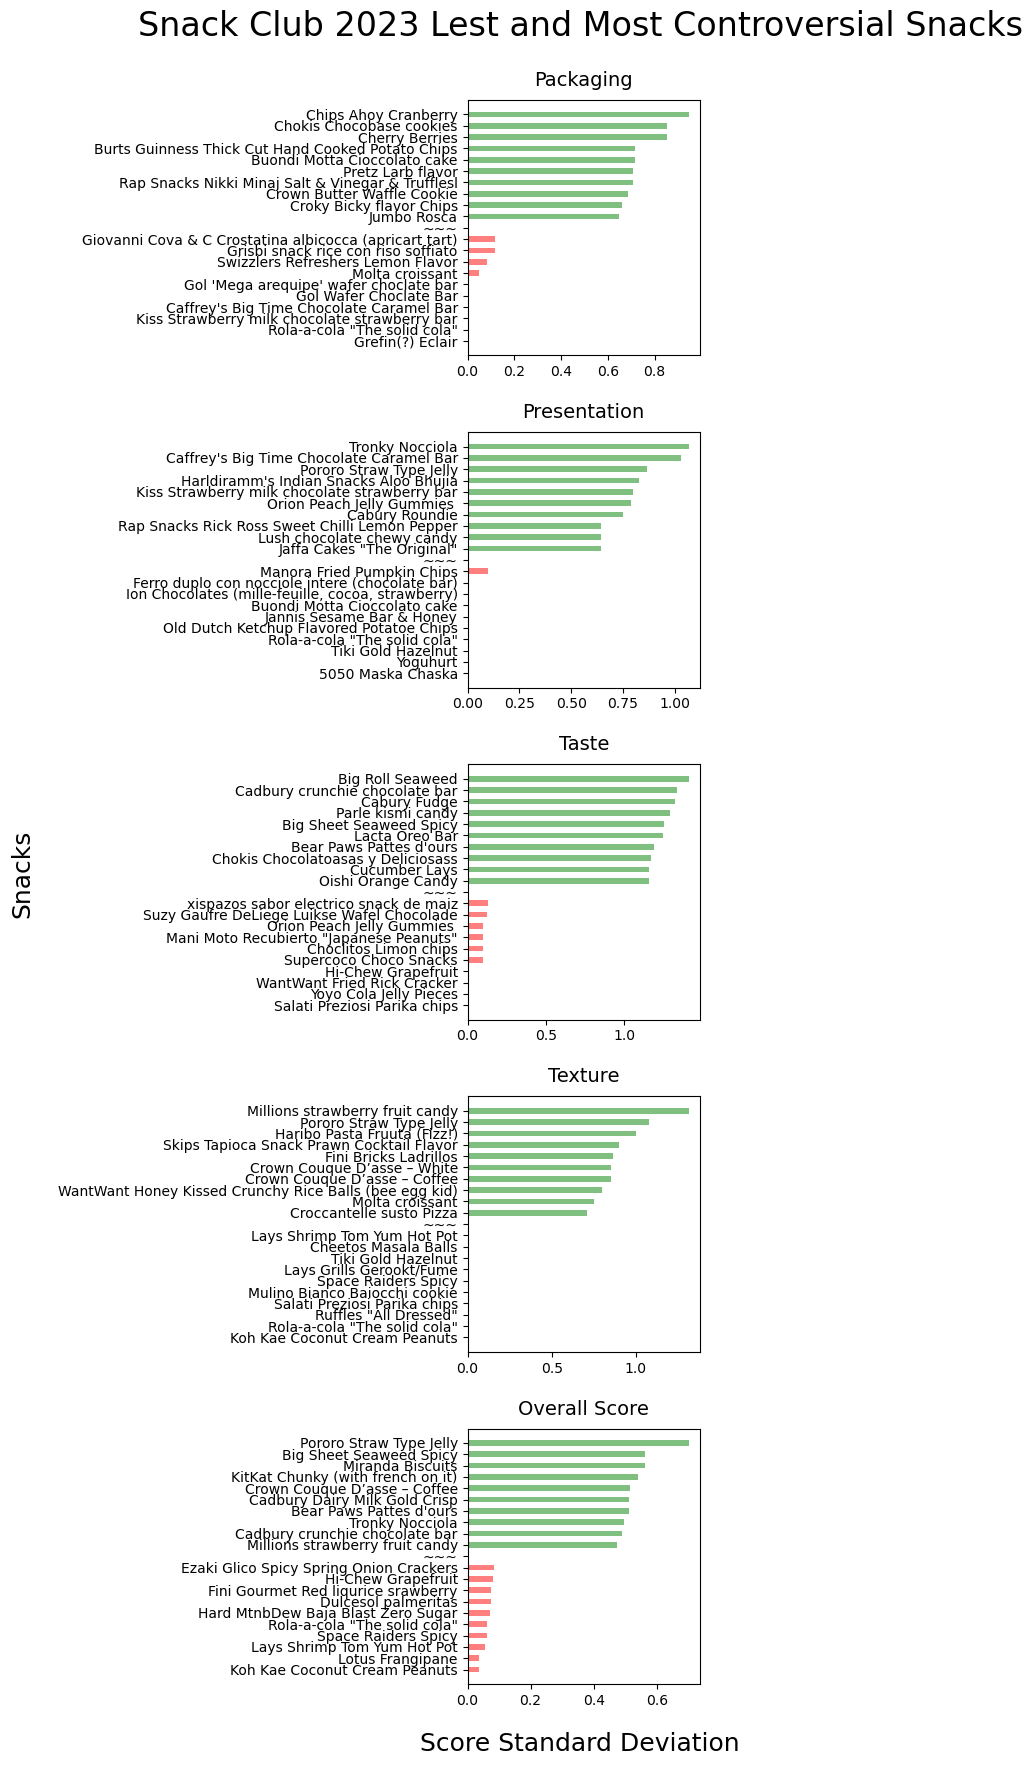

In [9]:
import matplotlib.pyplot as plt

df_std = df_stats_snacks.loc[:, idx[:, ['std']]]
df_std.columns = df_std.columns.droplevel(1)

fig, axs = plt.subplots(5,1,figsize=(3,18))
keys = [x for x in df_std.columns] # preserves order
targets = zip(keys, axs.flatten())
fig.suptitle('Snack Club 2023 Lest and Most Controversial Snacks', fontsize=24)
fig.supylabel('Snacks',x=-1.4,ha='left', fontsize=18)
fig.supxlabel('Score Standard Deviation', fontsize=18)
colors = {'Packaging':'blue',
          'Presentation':'green',
          'Taste':'red',
          'Texture':'purple',
         'Overall Score': 'cyan'}
by_label = {}
for i, (key, ax) in enumerate(targets):
    df_topfive = df_std[key].sort_values(ascending=False)[0:10].sort_values()
    df_lowfive = df_std[key].sort_values()[0:10].sort_values()
    df_low_top = pd.concat([df_topfive, pd.Series(['~',0]), df_lowfive])
    
    ax.set_title(f"{key}", fontsize=14,pad=10)
        
    snacks = df_lowfive.index.values
    scores = df_lowfive.values
    color = 'red'
    ax.barh(snacks, scores,
           color=color,label=key, 
           alpha=.5,height=0.5)
    
    ax.barh(['~~~'], [0],height=0.0)
    
    snacks = df_topfive.index.values
    scores = df_topfive.values
    color = 'green'
    ax.barh(snacks, scores,
           color=color,label=key, 
           alpha=.5,height=0.5)
fig.align_labels() 
fig.subplots_adjust(top=0.93,bottom=0.05,hspace = 0.3, wspace = 0.1)
fig.savefig(f'plots/sc_bestworst_snack_std.png',bbox_inches='tight')

### Plots, Best Snacks by Member & Category
Save these figures to pictures because they are so large.

In [10]:
df_stacked = df.stack().reset_index().rename(columns={'level_4':'Category',
                                        0 : 'Score'})
df_stacked = df_stacked.set_index(['Date','Country','Snack',
                                  'Member','Category'])

grouped = df_stacked.groupby(['Member','Category'],sort=False)
keys = [x for (x,y) in grouped] # preserves order
members = [k[0] for k in keys]
# categories = [k[1] for k in keys]
categories = ['Overall Score','Taste','Texture','Presentation','Packaging']

for i, memb in enumerate(members):
    fig, axs = plt.subplots(5,1,figsize=(4,24))
    targets = zip(categories, axs.flatten())
    fig.suptitle(f'Snack Club 2023 Best & Worst Snacks - Member {memb}', fontsize=24)
    fig.supylabel('Snacks',x=-0.3,ha='left', fontsize=18)
    fig.supxlabel('Score', fontsize=18)
    by_label = {}
    for j, (cat,ax) in enumerate(targets):
        idx = pd.IndexSlice
        df_f = df_stacked.loc[idx[:, :, :, memb, cat]]
        df_top = df_f['Score'].sort_values(ascending=False)[0:10].sort_values()
        df_low = df_f['Score'].sort_values()[0:10].sort_values()
        # df_low_top = pd.concat([df_top, pd.Series(['~',0]), df_low])
        # display(df_low_top)
        ax.set_title(f"{memb} - {cat}", fontsize=14,pad=10)
        snacks = [x[2] for x in df_low.index.values]
        scores = df_low.values
        color = 'red'
        ax.barh(snacks, scores,
               color=color,label=cat, 
               alpha=.5,height=0.6)

        ax.barh(['~~~'], [0],height=0.0)

        snacks = [x[2] for x in df_top.index.values]
        scores = df_top.values
        color = 'green'
        ax.barh(snacks, scores,
               color=color,label=cat, 
               alpha=.5,height=0.5)
        ax.set_xticks([1,2,3,4,5])
    fig.subplots_adjust(top=0.93,bottom=0.05,hspace = 0.3, wspace = 0.2)
    fig.savefig(f'plots/sc_bestworst_snack_{memb}.png',bbox_inches='tight')
    plt.close(fig)

## By Country/Crate

In [11]:
# # Stats Country
display('*************************************')
display('Stats by Country')
df_stats_country = df.groupby(['Country']).agg(['min','max','mean','median','std'])
idx = pd.IndexSlice
# display(df_stacked.droplevel(['Member','Category','Date']).reset_index().drop(columns='Score').set_index())
df_sc = df_stats_country.loc[:, idx[:, ['mean','std']]].copy()
# better way to get count of countries? lol
c_count = df_stacked.reset_index()[['Country','Snack']].drop_duplicates().set_index(['Country']).groupby(['Country']).agg(['count'])
# df_sc[('','count')] = c_count
df_sc = pd.concat([df_sc,c_count], axis=1)

display(df_sc.sort_values(by=('Taste','mean'),ascending=False))
display(df_sc.agg(['idxmax','idxmin']))

'*************************************'

'Stats by Country'

Packaging       Presentation       Taste       Texture  \
                           mean   std         mean   std  mean   std    mean   
Country                                                                        
Caribbean                  3.18  0.73         2.82  0.42  3.73  0.56    3.72   
Thailand                   3.60  0.75         2.86  0.59  3.56  0.89    3.42   
Belgium                    2.89  0.75         3.42  0.58  3.54  0.80    3.62   
China                      3.89  0.57         3.29  0.85  3.51  0.76    3.40   
America-Vegas-Special      3.81  0.85         3.75  0.48  3.46  0.80    3.59   
Ireland                    3.45  0.78         3.15  0.79  3.45  0.89    3.35   
Italy                      3.12  0.59         3.25  0.96  3.43  0.69    3.45   
Spain                      2.83  0.78         3.07  0.68  3.39  0.75    3.49   
India                      3.11  0.79         2.94  0.81  3.38  0.91    3.31   
Canada                     3.33  0.72         3.39  0.90  3.36  0.93    3.22   
Colombia                   3.26  0.60         2.96  0.56  3.34  0.69    3.35   
Greece                     3.18  0.77         3.46  0.56  3.26  0.84    3.42   
Korea                      3.40  0.89         3.02  1.01  3.22  0.86    2.83   
United Kingdom             3.33  0.77         2.91  1.00  2.94  0.95    3.07   

                            Overall Score       Snack  
                        std          mean   std count  
Country                                                
Caribbean              0.58          3.36  0.33     4  
Thailand               0.70          3.36  0.46    16  
Belgium                0.81          3.37  0.46    11  
China                  0.79          3.52  0.54    11  
America-Vegas-Special  0.38          3.65  0.30     4  
Ireland                0.78          3.35  0.61    11  
Italy                  0.85          3.31  0.64    12  
Spain                  0.68          3.19  0.52    10  
India                  0.39          3.19  0.38    11  
Canada                 0.87          3.33  0.64     9  
Colombia               0.78          3.23  0.40    14  
Greece                 0.67          3.33  0.41    12  
Korea                  1.11          3.12  0.78    10  
United Kingdom         1.15          3.06  0.71    12

Packaging                  Presentation                      Taste  \
            mean    std                   mean        std            mean   
idxmax     China  Korea  America-Vegas-Special      Korea       Caribbean   
idxmin     Spain  China              Caribbean  Caribbean  United Kingdom   

                          Texture                         \
                   std       mean                    std   
idxmax  United Kingdom  Caribbean         United Kingdom   
idxmin       Caribbean      Korea  America-Vegas-Special   

                Overall Score                                         Snack  
                         mean                    std                  count  
idxmax  America-Vegas-Special                  Korea               Thailand  
idxmin         United Kingdom  America-Vegas-Special  America-Vegas-Special

### Best/West Snack in Country/Crate

In [12]:
df_stats_cs = df.groupby(['Country','Snack']).agg(['mean'])
idx = pd.IndexSlice
df_scs = df_stats_cs.loc[:, idx[:, ['mean']]]
display('Best Snacks By Country (Average Score)')
display(df_scs.groupby('Country').agg(['idxmax']).applymap(lambda x: x[1]).droplevel(axis='columns',level=[2,1]))
display('Worst Snacks By Country (Average Score)')
display(df_scs.groupby('Country').agg(['idxmin']).applymap(lambda x: x[1]).droplevel(axis='columns',level=[2,1]))

'Best Snacks By Country (Average Score)'

,Packaging,Presentation,Taste,Texture,Overall Score
Country,,,,,
America-Vegas-Special,Hard MtnbDew Baja Blast Zero Sugar,Hard MtnbDew Baja Blast Zero Sugar,Rap Snacks Nikki Minaj Salt & Vinegar & Trufflesl,"Rap Snacks Lily Baby ""All In"" Flavor Salt & Vi...",Hard MtnbDew Baja Blast Zero Sugar
Belgium,Lotus Biscoff with Belgium Choclate,Cote D'OR chocolate,Cote D'OR chocolate,Cote D'OR chocolate,Cote D'OR chocolate
Canada,Old Dutch Ketchup Flavored Potatoe Chips,KitKat Chunky (with french on it),Humpty Dumpty Ringolos BBQ Flavor,"Ruffles ""All Dressed""",Humpty Dumpty Ringolos BBQ Flavor
Caribbean,Ole Xtreme Rranch Tortilla Chips,Ole Xtreme Rranch Tortilla Chips,Tiki Gold Hazelnut,Tiki Gold Hazelnut,Tiki Gold Hazelnut
China,Orion Peach Jelly Gummies,WantWant Honey Kissed Crunchy Rice Balls (bee ...,Hi-Chew Grapefruit,Chips Ahoy Cranberry,Hi-Chew Grapefruit
Colombia,Jumbo Flow,Jumbo Rosca,Supercoco Choco Snacks,Chokis Chocolatoasas y Deliciosass,Jumbo Flow
Greece,Derby Caramel Bar,"Jumbo Vrikoles, cheese and tomoato",Kiss Strawberry milk chocolate strawberry bar,Kiss Strawberry milk chocolate strawberry bar,Derby Caramel Bar
India,Waffy vanilla wafers,Prele-G Gold Biscuits,Prele-G Gold Biscuits,Prele-G Gold Biscuits,Prele-G Gold Biscuits
Ireland,Keogh's Shamrock and Sour Cream Chips,Keogh's Shamrock and Sour Cream Chips,Keogh's Shamrock and Sour Cream Chips,Keogh's Shamrock and Sour Cream Chips,Keogh's Shamrock and Sour Cream Chips


'Worst Snacks By Country (Average Score)'

,Packaging,Presentation,Taste,Texture,Overall Score
Country,,,,,
America-Vegas-Special,Rap Snacks Nikki Minaj Salt & Vinegar & Trufflesl,"Rap Snacks Lily Baby ""All In"" Flavor Salt & Vi...","Rap Snacks Lily Baby ""All In"" Flavor Salt & Vi...",Hard MtnbDew Baja Blast Zero Sugar,"Rap Snacks Lily Baby ""All In"" Flavor Salt & Vi..."
Belgium,Gicopa violet,Grefin(?) Eclair,DeliChoc Choco'Bar,DeliChoc Choco'Bar,DeliChoc Choco'Bar
Canada,Coffee Crisp Double Double Chocolate Bar,Kerr's Toffee candy,Kerr's Toffee candy,Kerr's Toffee candy,Kerr's Toffee candy
Caribbean,Tiki Gold Hazelnut,Jamaican Choice Spice Bun,Ole Xtreme Rranch Tortilla Chips,Cherry Berries,Jamaican Choice Spice Bun
China,Oishi Orange Candy,Aji Oolong Peach Jelly,Oreo Oolong + Peach,Aji Oolong Peach Jelly,Aji Oolong Peach Jelly
Colombia,Chokis Chocolatoasas y Deliciosass,Chokis Chocobase cookies,Choclitos Limon chips,Colombina Coffee Delight chewy candy,Choclitos Limon chips
Greece,Kiss Strawberry milk chocolate strawberry bar,Derby Caramel Bar,Keraso Pitaki cherry pie,Keraso Pitaki cherry pie,Keraso Pitaki cherry pie
India,5050 Maska Chaska,"Rola-a-cola ""The solid cola""",Treat Burst Choco Fills,Cheetos Masala Balls,Treat Burst Choco Fills
Ireland,Cadbury Snack! shortcake,Burts Guinness Thick Cut Hand Cooked Potato Chips,Caffrey's Big Time Chocolate Caramel Bar,Cleeves Original Toffee,Cleeves Original Toffee


## Score Spread, Histograms

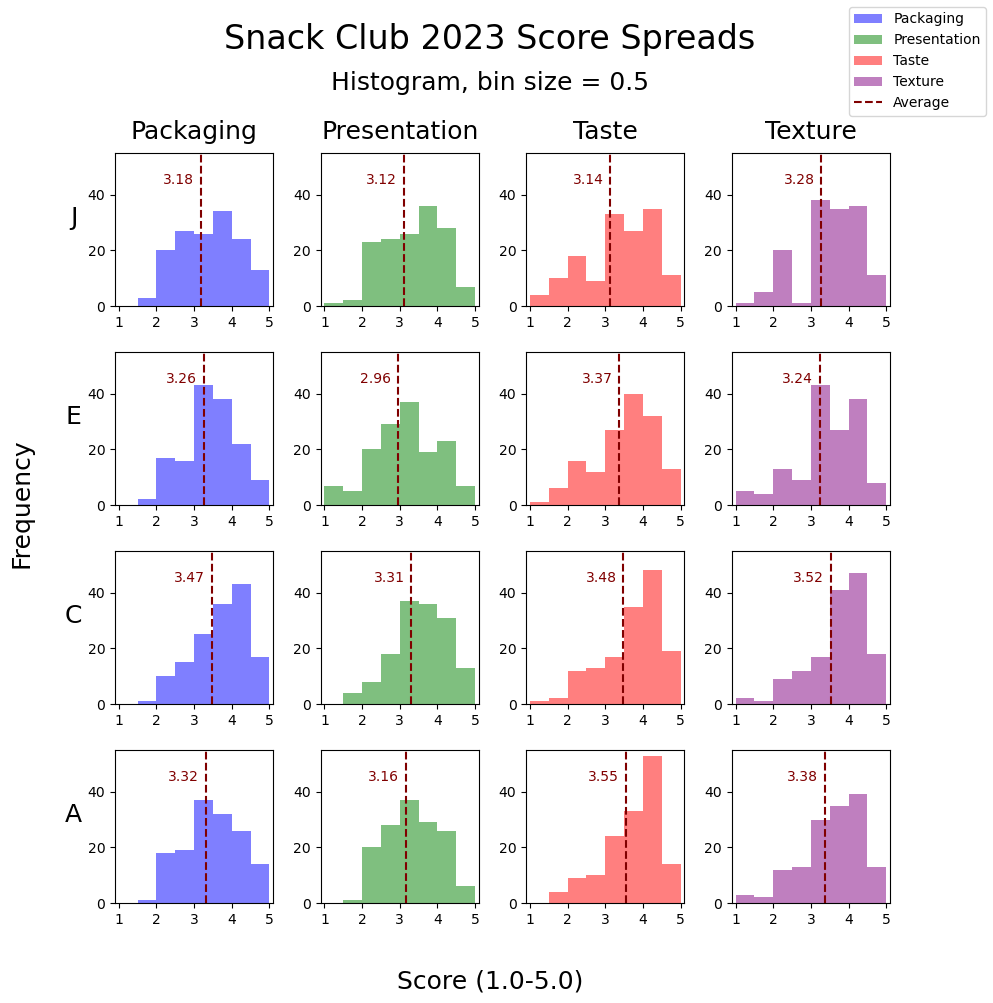

In [13]:
df_stacked = df.stack().reset_index().rename(columns={'level_4':'Category',
                                        0 : 'Score'})
df_stacked = df_stacked.set_index(['Date','Country','Snack',
                                  'Member','Category'])
# df_stacked = df_stacked.reindex(
#     labels=['Packaging','Presentation','Taste',
#             'Texture','Overall Score'], level='Category')


df_stacked = df_stacked.drop(index='Overall Score',level='Category')
fig, axs = plt.subplots(4,4,figsize=(10,10))
groups1 = ['Member','Category']
groups2 = ['Category']
grouped = df_stacked.groupby(groups1,sort=False)
keys = [x for (x,y) in grouped] # preserves order
targets = zip(keys, axs.flatten())
fig.suptitle('Snack Club 2023 Score Spreads', fontsize=24)
fig.text(0.5,0.92,'Histogram, bin size = 0.5', va='center',ha='center', fontsize=18)
fig.supxlabel('Score (1.0-5.0)', fontsize=18)
fig.supylabel('Frequency', fontsize=18)
colors = {'Packaging':'blue',
          'Presentation':'green',
          'Taste':'red',
          'Texture':'purple'}
by_label = {}
for i, (key, ax) in enumerate(targets):
    j = i%4
    member=key[0]
    category = key[1]
    if i < 4:
        ax.set_title(f"{category}", fontsize=18,
                    pad=10)
    if j == 0:
        ax.set_ylabel(f"{member}", rotation=0, fontsize=18,
                     labelpad=10)
    color = colors[category]
    dfg = grouped.get_group(key)
    dfg = dfg.reset_index(drop=True)
    dfg = dfg.reset_index()
    # display(dfCategory)
    avg = dfg.mean()[1]
    counts, bins = np.histogram(dfg['Score'],range=(0,5.0))
    ax.hist(bins[:-1], bins, weights=counts,
               color=color,label=category, 
               alpha=.5)
    ax.axvline(x=avg, color='maroon', linestyle='--', 
               label="Average",
               linewidth=1.5)
    ax.set_ylim([0,55])
    ax.set_xlim([0.9,5.1])
    ax.text(avg-1, 44, f'{avg:.2f}', ha='left',color='maroon')
    ax.set_xticks([1,2,3,4,5])
    handles, labels = ax.get_legend_handles_labels()
    by_label.update(dict(zip(labels, handles))) # removes duplicate legends
order = [0,2,3,4,1]
lvals = [x for x in by_label.values()]
lvals = [lvals[idx] for idx in order]
kvals = [x for x in by_label.keys()]
kvals = [kvals[idx] for idx in order]
fig.legend(lvals,kvals , loc='upper right')
fig.subplots_adjust(top=0.85,bottom=0.1, hspace = 0.3, wspace = 0.3)
fig.savefig('plots/sc_2023_histograms.png')

## Score Spread, Bar Chart Value Counts

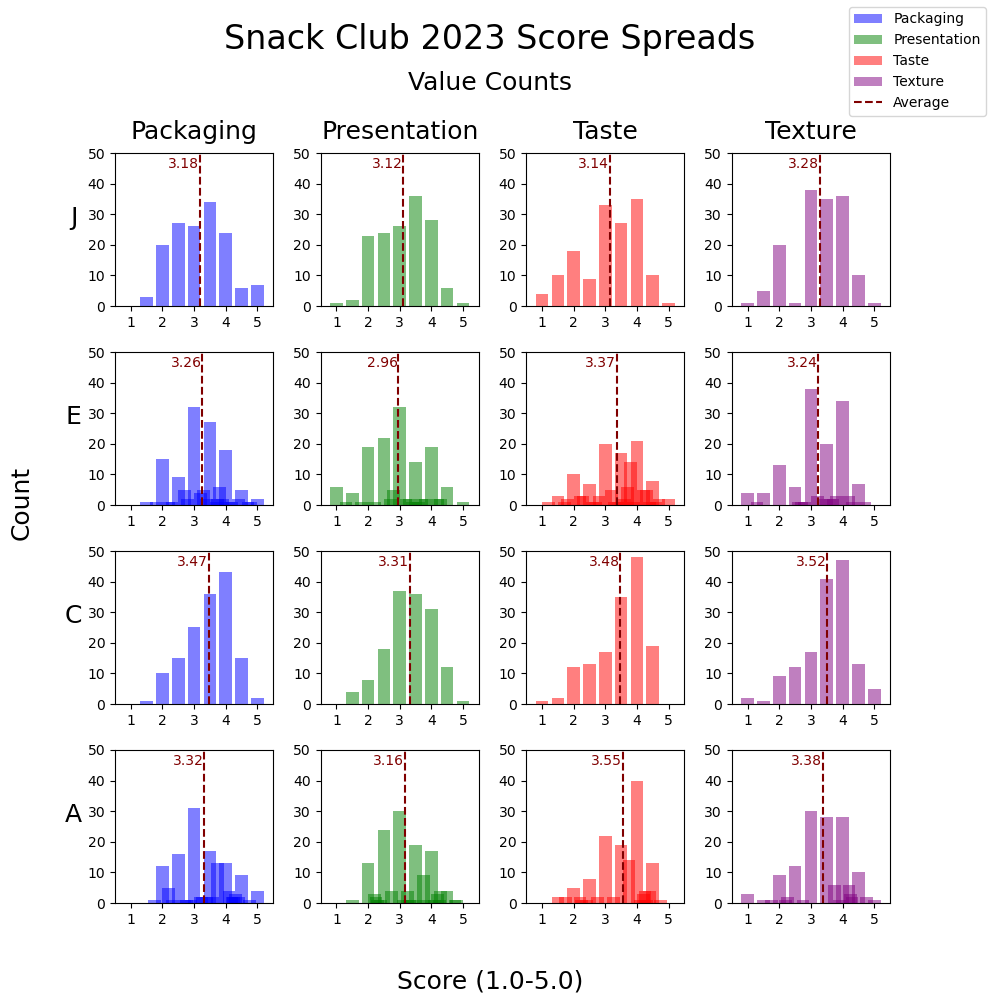

In [14]:
import matplotlib.pyplot as plt


df_stacked = df.stack().reset_index().rename(columns={'level_4':'Category',
                                        0 : 'Score'})
df_stacked = df_stacked.set_index(['Date','Country','Snack',
                                  'Member','Category'])
df_stacked = df_stacked.reindex(
    labels=['Packaging','Presentation','Taste',
            'Texture','Overall Score'], level='Category')


df_stacked = df_stacked.drop(index='Overall Score',level='Category')
fig, axs = plt.subplots(4,4,figsize=(10,10))
groups1 = ['Member','Category']
groups2 = ['Category']
grouped = df_stacked.groupby(groups1,sort=False)
keys = [x for (x,y) in grouped] # preserves order
targets = zip(keys, axs.flatten())
fig.suptitle('Snack Club 2023 Score Spreads', fontsize=24)
fig.text(0.5,0.92,'Value Counts', va='center',ha='center', fontsize=18)
fig.supxlabel('Score (1.0-5.0)', fontsize=18)
fig.supylabel('Count', fontsize=18)
colors = {'Packaging':'blue',
          'Presentation':'green',
          'Taste':'red',
          'Texture':'purple'}
by_label = {}
for i, (key, ax) in enumerate(targets):
    j = i%4
    member=key[0]
    category = key[1]
    if i < 4:
        ax.set_title(f"{category}", fontsize=18,
                    pad=10)
    if j == 0:
        ax.set_ylabel(f"{member}", rotation=0, fontsize=18,
                     labelpad=10)
    dfg = grouped.get_group(key)
    dfg = dfg.reset_index(drop=True)
    avg = dfg['Score'].mean()
    dfg = dfg.value_counts().reset_index()
    dfg = dfg.rename(columns={0:'count'})
    # display(dfCategory)
    color = colors[category]
    ax.bar(dfg['Score'],dfg['count'],
               color=color,label=category, 
               alpha=.5,width=0.4)
    ax.axvline(x=avg, color='maroon', linestyle='--', 
               label="Average",
               linewidth=1.5)
    ax.set_ylim([0,50])
    ax.set_xlim([0.5,5.5])
    ax.set_xticks([1,2,3,4,5])
    ax.text(avg-1, 45, f'{avg:.2f}', ha='left',color='maroon')
    handles, labels = ax.get_legend_handles_labels()
    by_label.update(dict(zip(labels, handles))) # removes duplicate legends
order = [1,2,3,4,0]
lvals = [x for x in by_label.values()]
lvals = [lvals[idx] for idx in order]
kvals = [x for x in by_label.keys()]
kvals = [kvals[idx] for idx in order]
fig.legend(lvals,kvals , loc='upper right')
fig.subplots_adjust(top=0.85,bottom=0.1, hspace = 0.3, wspace = 0.3)  
fig.savefig('plots/sc_2023_bar_vcs.png')

## Number of unique scores

In [15]:
display('# Unique scores')
display(df_stacked.groupby('Member').apply(lambda x: x.value_counts().shape[0]).sort_values())

'# Unique scores'

Member
C     9
J     9
A    33
E    33
dtype: int64

## Ones, Fives, Below 3

In [16]:
def custom_round(x, base=5):
    return round(base * round(float(x)/base),2)

df_thresh = pd.DataFrame()
df_thresh['Score'] = df_stacked['Score']
df_thresh['Score Round 0.5'] = df_stacked['Score'].apply(lambda x: custom_round(x,base=0.5))
df_thresh['Score Rounded == 1'] = df_thresh[['Score Round 0.5']] == 1
# display(df_thresh.loc[df_thresh['Score Rounded == 1'] == True])
df_thresh['Score Rounded == 5'] = df_thresh[['Score Round 0.5']] == 5

df_thresh['Score Rounded < 3'] = df_thresh[['Score Round 0.5']] < 3
# display(df_thresh.loc[df_thresh['Score Rounded == 5'] == True])
# df_thresh['Score, around 2.5'] = (df_stacked[['Score']] > 2.25) & (df_stacked[['Score']] < 2.75)
# display(df_thresh)

for gs in [['Member'],['Category'],['Category','Member']]:
    df_thresh_mc = pd.DataFrame()
    df_thresh_mc['# Score'] = df_thresh['Score Rounded == 1'].groupby(gs).apply(lambda x: x.count())
    df_thresh_mc['# Score Rounded == 1'] = df_thresh['Score Rounded == 1'].groupby(gs).apply(sum)
    df_thresh_mc['# Score Rounded == 5'] = df_thresh['Score Rounded == 5'].groupby(gs).apply(sum)
    df_thresh_mc['# Score Rounded < 3'] = df_thresh['Score Rounded < 3'].groupby(gs).apply(sum)
    display(df_thresh_mc)

,# Score,# Score Rounded == 1,# Score Rounded == 5,# Score Rounded < 3
Member,,,,
A,588,3,11,131
C,588,3,8,108
E,588,11,6,151
J,588,6,10,168


,# Score,# Score Rounded == 1,# Score Rounded == 5,# Score Rounded < 3
Category,,,,
Packaging,588,0,17,145
Presentation,588,7,5,181
Taste,588,6,4,122
Texture,588,10,9,110


# Score  # Score Rounded == 1  # Score Rounded == 5  \
Category     Member                                                        
Packaging    A           147                     0                     5   
             C           147                     0                     2   
             E           147                     0                     3   
             J           147                     0                     7   
Presentation A           147                     0                     2   
             C           147                     0                     1   
             E           147                     6                     1   
             J           147                     1                     1   
Taste        A           147                     0                     1   
             C           147                     1                     0   
             E           147                     1                     2   
             J           147                     4                     1   
Texture      A           147                     3                     3   
             C           147                     2                     5   
             E           147                     4                     0   
             J           147                     1                     1   

                     # Score Rounded < 3  
Category     Member                       
Packaging    A                        36  
             C                        26  
             E                        33  
             J                        50  
Presentation A                        45  
             C                        30  
             E                        56  
             J                        50  
Taste        A                        21  
             C                        28  
             E                        32  
             J                        41  
Texture      A                        29  
             C                        24  
             E                        30  
             J                        27

## Score Similarity
I could make this better by rounding all scores to nearest 0.5 interval.

In [17]:
import itertools
df
df_stacked = df_stacked.drop(index='Overall Score',level='Category')
df_m = df_stacked.unstack(level=-2)
df_m.columns = df_m.columns.droplevel()
# is there an easier way to do this? lol
combo = list(itertools.combinations(df_m.columns, 2))
for c in combo:
    c_str = c[0] + c[1]
    df_m[c_str] = abs(df_m[c[0]] - df_m[c[1]])

df_dif = df_m.drop(columns=['A','C','E','J'])    

# by category
df_dif_mean = df_dif.groupby('Category').mean()

# All scores
df_dif_mean_all = df_dif.mean().to_frame().T
df_dif_mean_all = df_dif_mean_all.rename(columns={0:'Average Difference, All Scores'})
df_dif_mean_all = pd.concat([df_dif_mean, df_dif_mean_all]) 
df_dif_mean_all = df_dif_mean_all.rename({0 : 'All Scores'}) 
df_dif_mean_all = df_dif_mean_all.T
df_dif_mean_all

,Packaging,Presentation,Taste,Texture,All Scores
Member,,,,,
AC,0.43,0.33,0.49,0.39,0.41
AE,0.45,0.41,0.56,0.39,0.45
AJ,0.44,0.30,0.60,0.35,0.42
CE,0.35,0.48,0.56,0.44,0.46
CJ,0.47,0.41,0.74,0.45,0.52
EJ,0.41,0.41,0.68,0.40,0.47


In [18]:
# by snack
idx = pd.IndexSlice
df_dif_taste = df_dif.unstack('Category').loc[:, idx[:, ['Taste']]].droplevel(axis='columns',level=1)
df_dif_taste_max = df_dif_taste.agg(['idxmax']).applymap(lambda x: x[2])
d_dif_taste_m = df_dif_taste.T.droplevel(axis='columns',level=[0,1]).unstack().to_frame()
d_dif_taste_m = d_dif_taste_m.reset_index().set_index(['Member','Snack']).sort_values(by=[0],ascending=False)
display(d_dif_taste_m.reorder_levels([1,0]).groupby('Member').apply(lambda x: x[-4:-1]).droplevel(axis='rows',level=2).rename(columns={0:'Taste Score Least Diff (Sample 3)'}))
display(d_dif_taste_m.reorder_levels([1,0]).groupby('Member').apply(lambda x: x[0:3]).droplevel(axis='rows',level=2).rename(columns={0:'Taste Score Most Diff (Sample 3)'}))


Taste Score Least Diff (Sample 3)
Member Snack                                                                                
AC     Hard MtnbDew Baja Blast Zero Sugar                                                0.0
       Oishi Orange Candy                                                                0.0
       Croccantelle susto Pizza                                                          0.0
AE     Chokis Chocobase cookies                                                          0.0
       Yoyo Cola Jelly Pieces                                                            0.0
       Loacker Classic Cocoa & Milk Wafer                                                0.0
AJ     Swizzlers Refreshers Lemon Flavor                                                 0.0
       Hard MtnbDew Baja Blast Zero Sugar                                                0.0
       Cleeves Original Toffee                                                           0.0
CE     Buondi Motta Cioccolato cake                                                      0.0
       Cabury BOOST                                                                      0.0
       Manora Fried Pumpkin Chips                                                        0.0
CJ     Cleeves Original Toffee                                                           0.0
       Rap Snacks Rick Ross Sweet Chilli Lemon Pepper                                    0.0
       Rap Snacks Lily Baby "All In" Flavor Salt & Vin...                                0.0
EJ     Buondi Motta Cioccolato cake                                                      0.0
       Cadbury Snack! shortcake                                                          0.0
       Rap Snacks Lily Baby "All In" Flavor Salt & Vin...                                0.0

Taste Score Most Diff (Sample 3)
Member Snack                                                                            
AC     Parle kismi candy                                                            2.00
       Pocky Sumer Paradise Peach Lychee & Elderflower                              2.00
       Jaffa Cakes "The Original"                                                   2.00
AE     Big Roll Seaweed                                                             2.90
       Bear Paws Pattes d'ours                                                      2.50
       Big Sheet Seaweed Spicy                                                      2.50
AJ     Cadbury crunchie chocolate bar                                               2.50
       Chokis Chocolatoasas y Deliciosass                                           2.25
       KitKat Chunky (with french on it)                                            2.00
CE     Cheetos Masala Balls                                                         2.50
       Big Sheet Seaweed Spicy                                                      2.50
       Ruffles "All Dressed"                                                        2.20
CJ     Parle kismi candy                                                            3.00
       Lacta Oreo Bar                                                               3.00
       Cadbury crunchie chocolate bar                                               3.00
EJ     Cabury Fudge                                                                 3.00
       Big Roll Seaweed                                                             3.00
       Cucumber Lays                                                                2.80

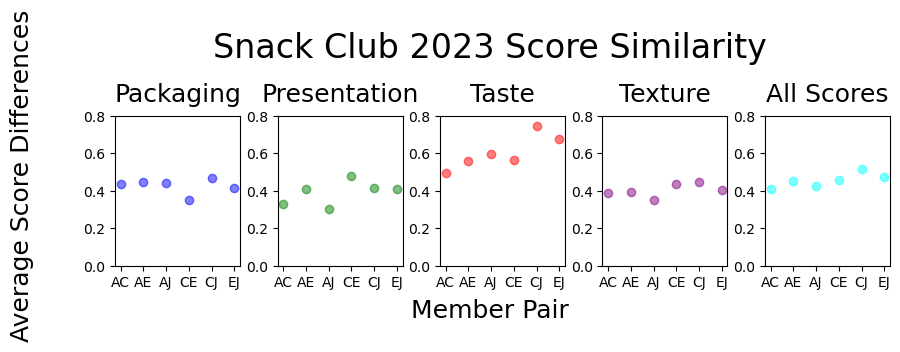

In [19]:
fig, axs = plt.subplots(1,5,figsize=(10,3))
fig.suptitle('Snack Club 2023 Score Similarity', fontsize=24)
fig.supxlabel('Member Pair', fontsize=18)
fig.supylabel('Average Score Differences', fontsize=18)

keys = df_dif_mean_all.columns # preserves order
targets = zip(keys, axs.flatten())
colors = ['blue','green','red','purple','cyan']
for i, (key, ax) in enumerate(targets):
    dfg = df_dif_mean_all[[key]]
    dfg = dfg.reset_index().reset_index()
    color = colors[i]
    dfg.columns = ['index','Member Pair', 'Average Difference']
    ax.scatter(dfg['Member Pair'],dfg['Average Difference'],
               color=color,
               label=key, 
               alpha=.5)
    ax.set_ylim([0,0.8])
    ax.set_title(f"{key}", fontsize=18,
                    pad=10)
fig.subplots_adjust(top=0.7,bottom=0.2, hspace = 0.3, wspace = 0.3)
fig.savefig('plots/sc_2023_score_sim.png')

## Tasted Better/Worst Than Looked

In [20]:
df_tp = pd.DataFrame()
df_tp['Taste - Pres.'] = df['Taste'] - df['Presentation']
df_tp['Taste < Pres.'] = df['Taste'] < df['Presentation']
display(df_tp['Taste - Pres.'].groupby('Member').mean().rename('Taste and Presentation Difference, Average').to_frame())
display('****************************************')
display(df_tp['Taste < Pres.'].groupby('Member').apply(lambda x: f"{x.sum()/x.size*100:.1f}" +'%').rename('Tasted Worst Than Looked (%)').to_frame())
display('****************************************')
display(df_tp['Taste - Pres.'].groupby('Snack').mean().sort_values().rename('Taste and Presentation Difference (avg by memb.), Top 10')[0:10].to_frame())


,"Taste and Presentation Difference, Average"
Member,
A,0.38
C,0.17
E,0.41
J,0.02


'****************************************'

,Tasted Worst Than Looked (%)
Member,
A,22.4%
C,29.9%
E,30.6%
J,35.4%


'****************************************'

,"Taste and Presentation Difference (avg by memb.), Top 10"
Snack,
Oreo Oolong + Peach,-1.70
Keraso Pitaki cherry pie,-1.64
Rowntrees Random fruit snacks,-1.44
Old Dutch Ketchup Flavored Potatoe Chips,-1.36
Croky Bicky flavor Chips,-1.32
"Rap Snacks Lily Baby ""All In"" Flavor Salt & Vinegar, BBQ, Onion, garlic, and more",-1.25
Choclitos Limon chips,-1.15
Lacta Oreo Bar,-1.06
DeliChoc Choco'Bar,-1.05
